# Drawing a latitude-longitude quadrangle

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/quadrangle.html

How to draw a latitude-longitude quadrangle on a map.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import HeliographicStonyhurst
from sunpy.data.sample import AIA_171_IMAGE

The purpose of this example is to demonstrate how to draw a quadrangle on a
map using `sunpy.map.GenericMap.draw_quadrangle`.  A quadrangle has
edges aligned with lines of constant latitude and longitude in some
coordinate system. We start with the sample AIA image.

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)

Now let's define the bottom-left corner of the quadrangle.  Note that we
define it in a different coordinate frame (heliographic Stonyhurst) than the
coordinate frame of the map (which is helioprojective Cartesian).

In [ ]:
bottom_left = SkyCoord(30*u.deg, -10*u.deg,
                       frame=HeliographicStonyhurst, obstime=aia.date)

Now let's draw a quadrangle on the map, with a width of 20 degrees and a
height of 60 degrees.  Because the coordinate frame of ``bottom_left`` is
in `sunpy.coordinates.frames.HeliographicStonyhurst`, the width and height
correspond to the longitude and latitude directions, respectively, in that
coordinate frame.

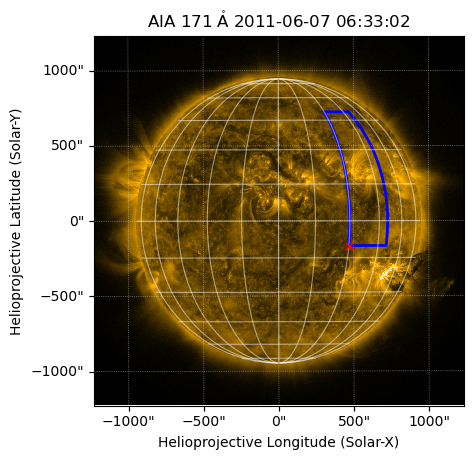

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
aia.draw_grid(axes=ax)
aia.draw_quadrangle(bottom_left, axes=ax, width=20*u.deg, height=60*u.deg,
                    edgecolor='blue', linewidth=2)
ax.plot_coord(bottom_left, 'x', color='red')

plt.show()